<a href="https://colab.research.google.com/github/Tyronnosaurus/dog-vs-cat-classification/blob/main/DL_Project_3_Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [13]:
import os

In [1]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
# Make sure to upload first the kaggle.json from your Kaggle account (Account->API)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [3]:
# Kaggle api
# https://www.kaggle.com/competitions/dogs-vs-cats/overview
# You need to manually accept the dataset's rules or you'll get a 403 Forbidden error
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:27<00:00, 32.7MB/s]
100% 812M/812M [00:27<00:00, 31.0MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# Extract the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# Extract the compressed dataset. Contains train.zip, test1.zip, sampleSubmission.csv
dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:

# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.10919.jpg', 'dog.11251.jpg', 'dog.9949.jpg', 'cat.1506.jpg', 'dog.7432.jpg', 'dog.5162.jpg', 'dog.11697.jpg', 'dog.2446.jpg', 'cat.1615.jpg', 'dog.5418.jpg', 'dog.11166.jpg', 'dog.1858.jpg', 'dog.2048.jpg', 'dog.718.jpg', 'cat.10126.jpg', 'dog.5436.jpg', 'cat.8467.jpg', 'dog.10817.jpg', 'dog.11059.jpg', 'cat.12404.jpg', 'dog.10163.jpg', 'dog.4148.jpg', 'cat.9389.jpg', 'dog.11925.jpg', 'cat.5405.jpg', 'dog.6716.jpg', 'cat.4459.jpg', 'cat.9556.jpg', 'dog.5287.jpg', 'dog.9849.jpg', 'cat.8613.jpg', 'cat.3119.jpg', 'cat.9399.jpg', 'dog.8444.jpg', 'dog.11619.jpg', 'cat.2005.jpg', 'dog.9055.jpg', 'dog.4561.jpg', 'cat.6019.jpg', 'cat.9775.jpg', 'dog.11946.jpg', 'dog.680.jpg', 'dog.12268.jpg', 'dog.2526.jpg', 'cat.5158.jpg', 'dog.6405.jpg', 'dog.4498.jpg', 'dog.3523.jpg', 'dog.10831.jpg', 'dog.6067.jpg', 'dog.5329.jpg', 'dog.7413.jpg', 'dog.494.jpg', 'cat.3171.jpg', 'cat.2073.jpg', 'dog.1859.jpg', 'dog.9927.jpg', 'cat.3300.jpg', 'cat.6654.jpg', 'cat.7472.jpg', 'cat.8071.jpg', 'dog.3081.jp

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

Displaying the images of dogs and cats

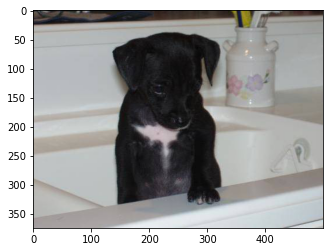

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

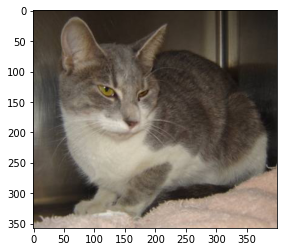

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [14]:
# Check how the filenames contain the target (cat or dog) at the beginning
file_names = os.listdir('/content/train/')

for i in range(5):
  name = file_names[i] 
  print(name[0:3])



dog
dog
dog
cat
dog


In [15]:
# Count number of dogs and cats
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name=='dog': dog_count += 1
  else:           cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [16]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [21]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))  # Standard resolution for working with images
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

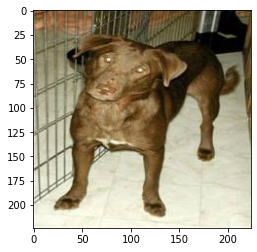

In [24]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

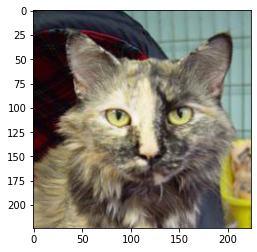

In [23]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [26]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]

  if file_name[0:3]=='dog':  labels.append(1)
  else:                      labels.append(0)

In [27]:
print(filenames[0:5])
print(len(filenames))

['dog.10919.jpg', 'dog.11251.jpg', 'dog.9949.jpg', 'cat.1506.jpg', 'dog.7432.jpg']
2000


In [28]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [29]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 996 1004]


Converting all the resized images to numpy arrays

In [30]:
import cv2
import glob

In [31]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [32]:
print(dog_cat_images[0])  # Print first image (converted to np array)

[[[  3   0  15]
  [  3   0  15]
  [  1   0  16]
  ...
  [ 41  45  50]
  [ 41  45  50]
  [ 41  45  50]]

 [[  3   0  15]
  [  3   0  15]
  [  1   0  16]
  ...
  [ 42  46  51]
  [ 41  45  50]
  [ 41  45  50]]

 [[  2   2  16]
  [  2   2  16]
  [  2   1  17]
  ...
  [ 42  46  51]
  [ 42  46  51]
  [ 41  45  50]]

 ...

 [[179 154 134]
  [178 153 133]
  [176 151 131]
  ...
  [155 120  94]
  [159 120  92]
  [164 125  97]]

 [[175 150 130]
  [179 154 134]
  [178 153 133]
  ...
  [149 114  88]
  [150 111  83]
  [158 119  91]]

 [[170 145 125]
  [176 151 131]
  [176 151 131]
  ...
  [156 121  95]
  [150 111  83]
  [155 116  88]]]


In [33]:
type(dog_cat_images)

numpy.ndarray

In [34]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


2000 images

224x224 pixels

3 color values per pixel

In [35]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [38]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [40]:
print(X_train_scaled[0]) # Print first image in train set

[[[0.82352941 0.79215686 0.81960784]
  [0.80392157 0.77254902 0.8       ]
  [0.78039216 0.74901961 0.77647059]
  ...
  [0.75686275 0.76862745 0.78823529]
  [0.77254902 0.78431373 0.80392157]
  [0.78823529 0.8        0.81960784]]

 [[0.82745098 0.79607843 0.82352941]
  [0.81176471 0.78039216 0.80784314]
  [0.79607843 0.76470588 0.79215686]
  ...
  [0.76470588 0.77647059 0.79607843]
  [0.78039216 0.79215686 0.81176471]
  [0.79607843 0.80784314 0.82745098]]

 [[0.82745098 0.79607843 0.82352941]
  [0.82352941 0.79215686 0.81960784]
  [0.81568627 0.78431373 0.81176471]
  ...
  [0.77254902 0.78431373 0.80392157]
  [0.78823529 0.8        0.81960784]
  [0.80392157 0.81568627 0.83529412]]

 ...

 [[0.74509804 0.75686275 0.77647059]
  [0.7254902  0.7372549  0.75686275]
  [0.72941176 0.74117647 0.76078431]
  ...
  [0.67843137 0.74117647 0.79215686]
  [0.6745098  0.7372549  0.78823529]
  [0.68627451 0.74901961 0.8       ]]

 [[0.74509804 0.75686275 0.77647059]
  [0.72941176 0.74117647 0.76078431]


**Building the Neural Network**

In [41]:
import tensorflow as tf
import tensorflow_hub as hub

In [42]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [43]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [44]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [45]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 71s 1s/step - loss: 0.2081 - acc: 0.9087
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0774 - acc: 0.9737
Epoch 3/5
50/50 [==============================] - 61s 1s/step - loss: 0.0572 - acc: 0.9812
Epoch 4/5
50/50 [==============================] - 61s 1s/step - loss: 0.0453 - acc: 0.9831
Epoch 5/5
50/50 [==============================] - 61s 1s/step - loss: 0.0367 - acc: 0.9850


In [46]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 26s 2s/step - loss: 0.0311 - acc: 0.9900
Test Loss = 0.031055858358740807
Test Accuracy = 0.9900000095367432


**Predictive System**

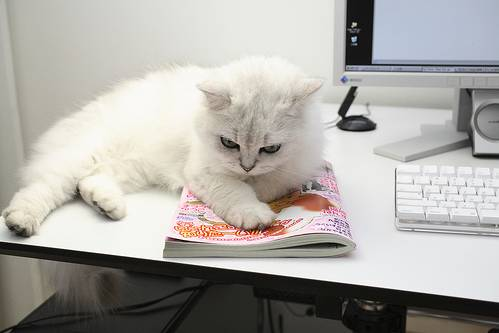

1/1 [==============================] - 0s 60ms/step
[[ 3.8545346 -4.999827 ]]
0
The image represents a Cat


In [49]:
def PredictImage(input_image_path):
  #input_image_path = input('Path of the image to be predicted: ') # Request user to input image path

  input_image = cv2.imread(input_image_path)
  cv2_imshow(input_image)
  input_image_resize = cv2.resize(input_image, (224,224))
  input_image_scaled = input_image_resize/255
  image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

  input_prediction = model.predict(image_reshaped)
  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)
  print(input_pred_label)

  if input_pred_label==0:  print('The image represents a Cat')
  else:                    print('The image represents a Dog')

PredictImage("train/cat.666.jpg")

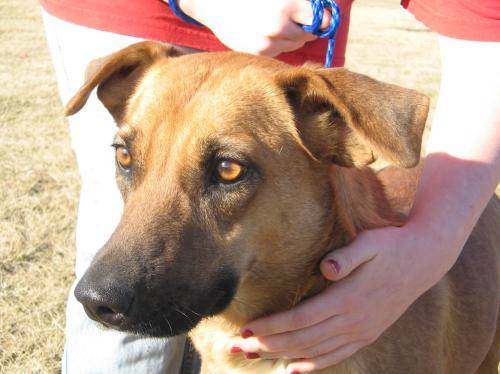

1/1 [==============================] - 0s 69ms/step
[[-3.3022585  3.9987082]]
1
The image represents a Dog


In [50]:
PredictImage("train/dog.123.jpg")